# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 # ....... Regression models .......
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# load dataset 

In [2]:
df=pd.read_csv('depression.csv')
df.head()

# Check dataset

In [3]:
df.shape

(604, 32)

In [4]:
len(df)

604

In [ ]:
df.isnull().sum()

In [5]:
print("Columns:", df.columns.tolist())

Columns: ['AGE_RANGE', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RESDPL', 'LIVWTH', 'ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'PHYEX', 'SMOKE', 'DRINK', 'ILLNESS', 'PREMED', 'EATDIS', 'AVGSLP', 'INSOM', 'TSSN', 'WRKPRE', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT', 'LOST', 'DEPRESSED', 'total_stress_score']


In [ ]:
df.info()                        


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#  converting columns to int
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

 

Categorical columns: ['AGE_RANGE', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RESDPL', 'LIVWTH', 'ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'PHYEX', 'SMOKE', 'DRINK', 'ILLNESS', 'PREMED', 'EATDIS', 'AVGSLP', 'INSOM', 'TSSN', 'WRKPRE', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT', 'LOST']


In [7]:
#  using loop for converting
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE_RANGE           604 non-null    int64  
 1   GENDER              604 non-null    int64  
 2   EDU                 604 non-null    int64  
 3   PROF                604 non-null    int64  
 4   MARSTS              604 non-null    int64  
 5   RESDPL              604 non-null    int64  
 6   LIVWTH              604 non-null    int64  
 7   ENVSAT              604 non-null    int64  
 8   POSSAT              604 non-null    int64  
 9   FINSTR              604 non-null    int64  
 10  DEBT                604 non-null    int64  
 11  PHYEX               604 non-null    int64  
 12  SMOKE               604 non-null    int64  
 13  DRINK               604 non-null    int64  
 14  ILLNESS             604 non-null    int64  
 15  PREMED              604 non-null    int64  
 16  EATDIS  

# Data Splitting

In [53]:
# Features (X)  All columns except target
X = df.drop(columns=["total_stress_score"])

# Target (y) target column
y = df["total_stress_score"]
print("\n\t  ******************************** ")
print("\t  X shape:", X.shape)
print("\n\t  y shape:", y.shape)
print("\t  ********************************\n ")


	  ******************************** 
	  X shape: (604, 31)

	  y shape: (604,)
	  ********************************
 


# Train, Test Spliting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=25
)
print("\n\t  ******************** ")
print("\t     Train size:", len(X_train))
print("\n\t   Test size:", len(X_test))
print("\t   ******************** ")



	  ******************** 
	     Train size: 453

	   Test size: 151
	   ******************** 


#  Correlation Analysis

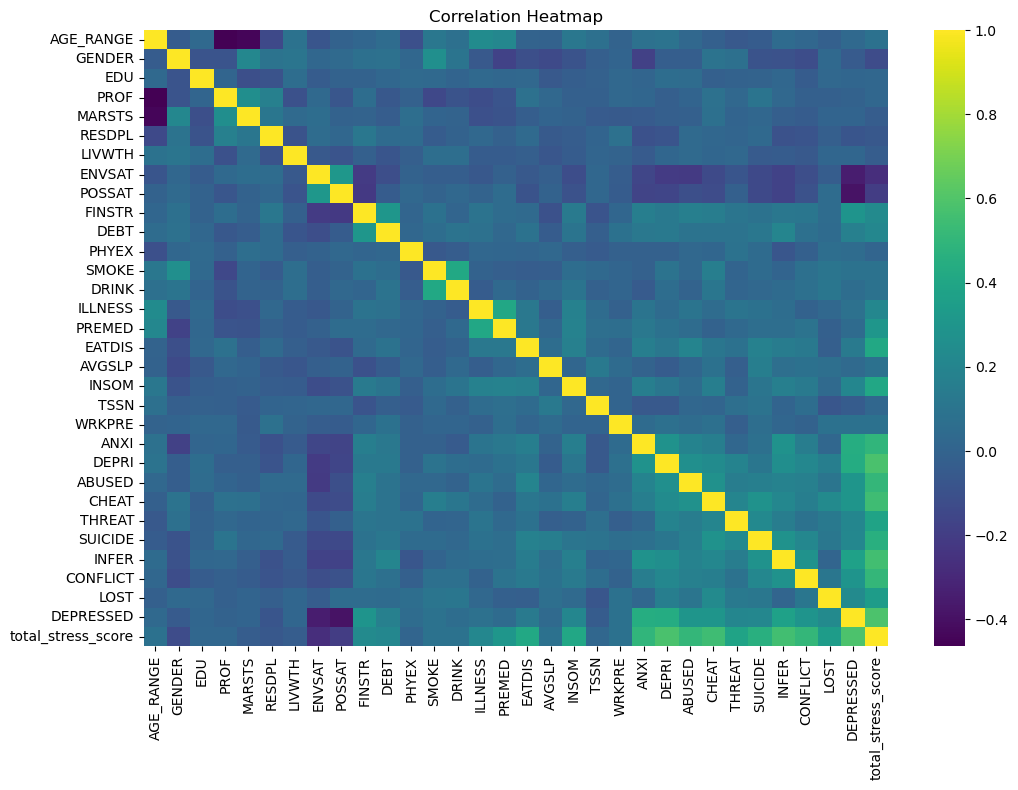

Correlation with target column:
total_stress_score    1.000000
DEPRESSED             0.584887
DEPRI                 0.578135
INFER                 0.555055
CHEAT                 0.542966
CONFLICT              0.506883
ABUSED                0.504215
ANXI                  0.492199
SUICIDE               0.461126
EATDIS                0.413562
INSOM                 0.408923
THREAT                0.383216
LOST                  0.341405
PREMED                0.305346
FINSTR                0.232545
DEBT                  0.214219
ILLNESS               0.212406
DRINK                 0.088826
SMOKE                 0.088196
AGE_RANGE             0.081460
WRKPRE                0.080550
AVGSLP                0.080169
PROF                  0.020469
TSSN                  0.019379
EDU                   0.016581
PHYEX                 0.008320
MARSTS               -0.036433
LIVWTH               -0.038378
RESDPL               -0.064731
GENDER               -0.131762
POSSAT               -0.202745
ENVSAT 

In [59]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

print("Correlation with target column:")
print(df.corr()["total_stress_score"].sort_values(ascending=False))


# Linear Regression Model

In [25]:
 model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()


	  *********************************************************

	 Train R squared :  0.9961355473777589

	 Train Mean Absolute Error :  0.08719860743021728

	  ********************************************************* 



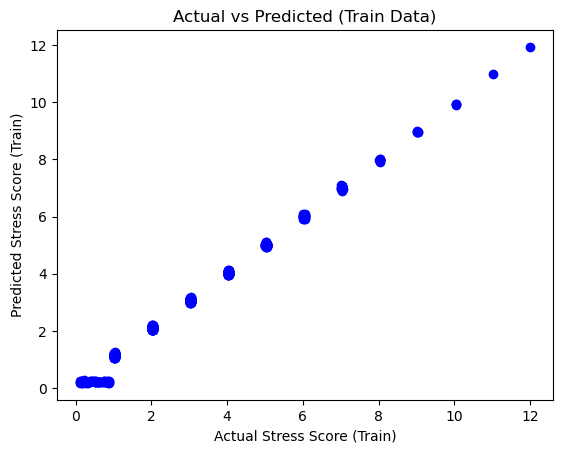

In [51]:
# Prediction on Train Data
 
training_data_prediction = model.predict(X_train)

# R squared error (Train)
score_train_r2 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error (Train)
score_train_mae = metrics.mean_absolute_error(y_train, training_data_prediction)

print("\n\t  *********************************************************")
print("\n\t Train R squared : ", score_train_r2)
print("\n\t Train Mean Absolute Error : ", score_train_mae)
print("\n\t  ********************************************************* \n")

# Scatter Plot (Train)

plt.scatter(y_train, training_data_prediction, color="blue")
plt.xlabel("Actual Stress Score (Train)")
plt.ylabel("Predicted Stress Score (Train)")
plt.title("Actual vs Predicted (Train Data)")
plt.show()

# Prediction on Test Data


	  *********************************************************
 
	 Test R squared :  0.9938719529169667

	 Test Mean Absolute Error :  0.1020171439612426

	  ********************************************************* 




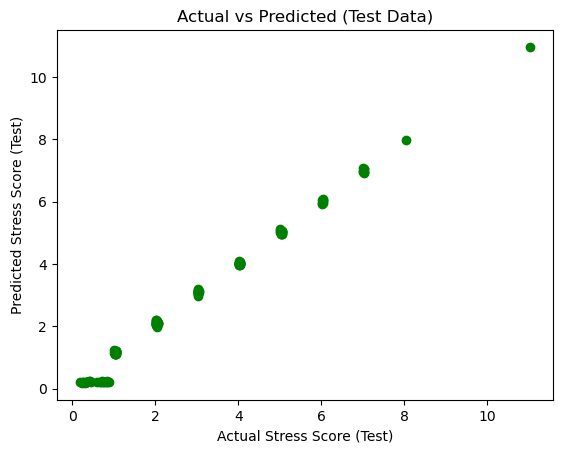

In [50]:
 
y_pred = model.predict(X_test)

# R squared error (Test)
score_test_r2 = metrics.r2_score(y_test, y_pred)

# Mean Absolute Error (Test)
score_test_mae = metrics.mean_absolute_error(y_test, y_pred)

print("\n\t  *********************************************************")
print(" \n\t Test R squared : ", score_test_r2)
print("\n\t Test Mean Absolute Error : ", score_test_mae)
print("\n\t  ********************************************************* \n\n")
# Scatter Plot (Test)
plt.scatter(y_test, y_pred, color="green")
plt.xlabel("Actual Stress Score (Test)")
plt.ylabel("Predicted Stress Score (Test)")
plt.title("Actual vs Predicted (Test Data)")
plt.show()
 

# Decision Tree 

In [31]:
 from sklearn import metrics

#  Model create & train
dt_model = DecisionTreeRegressor(random_state=25)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=25)


	  *********************************************************

	 Decision Tree Train R squared :  0.9999999644206361

	 Decision Tree Train Mean Absolute Error :  4.540414003425552e-05

	  ********************************************************* 




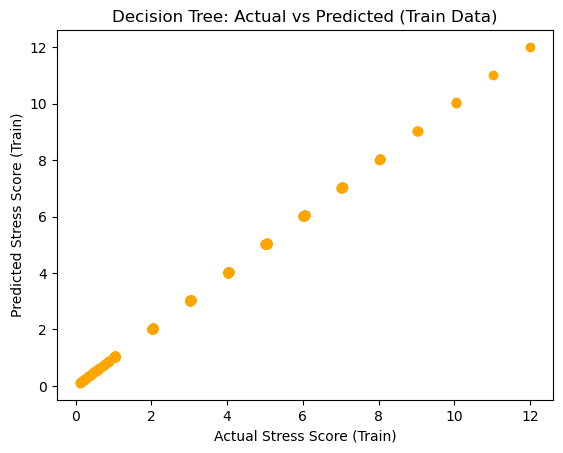

In [33]:
 # Prediction on Train Data
train_pred_dt = dt_model.predict(X_train)

# R squared error (Train)
score_train_r2_dt = metrics.r2_score(y_train, train_pred_dt)

# Mean Absolute Error (Train)
score_train_mae_dt = metrics.mean_absolute_error(y_train, train_pred_dt)

print("\n\t  *********************************************************")
print("\n\t Decision Tree Train R squared : ", score_train_r2_dt)
print("\n\t Decision Tree Train Mean Absolute Error : ", score_train_mae_dt)
print("\n\t  ********************************************************* \n\n")


# Scatter Plot (Train)
plt.scatter(y_train, train_pred_dt, color="orange")
plt.xlabel("Actual Stress Score (Train)")
plt.ylabel("Predicted Stress Score (Train)")
plt.title("Decision Tree: Actual vs Predicted (Train Data)")
plt.show()


# Prediction on Test Data


	  *********************************************************

	 Decision Tree Test R squared :  0.7446824123728556

	 Decision Tree Test Mean Absolute Error :  0.6462365966052039

	  ********************************************************* 




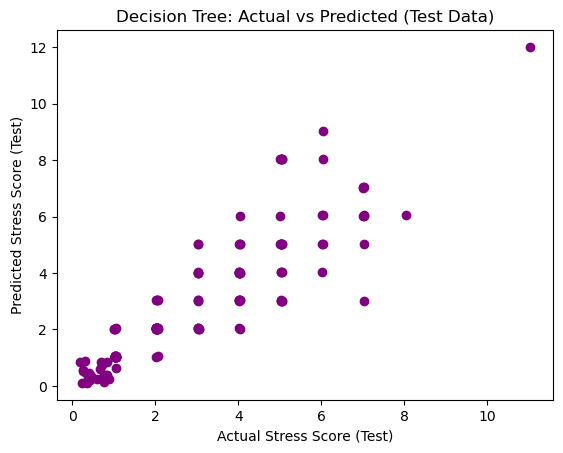

In [49]:
 
test_pred_dt = dt_model.predict(X_test)

# R squared error (Test)
score_test_r2_dt = metrics.r2_score(y_test, test_pred_dt)

# Mean Absolute Error (Test)
score_test_mae_dt = metrics.mean_absolute_error(y_test, test_pred_dt)

print("\n\t  *********************************************************")
print("\n\t Decision Tree Test R squared : ", score_test_r2_dt)
print("\n\t Decision Tree Test Mean Absolute Error : ", score_test_mae_dt)
print("\n\t  ********************************************************* \n\n")

# Scatter Plot (Test)
plt.scatter(y_test, test_pred_dt, color="purple")
plt.xlabel("Actual Stress Score (Test)")
plt.ylabel("Predicted Stress Score (Test)")
plt.title("Decision Tree: Actual vs Predicted (Test Data)")
plt.show()

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Model create & train
rf_model = RandomForestRegressor(n_estimators=50, random_state=25)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=25)


	  *********************************************************

	 Random Forest Train R squared :  0.9856981515186334

	 Random Forest Train Mean Absolute Error :  0.18916304597474934

	  ********************************************************* 




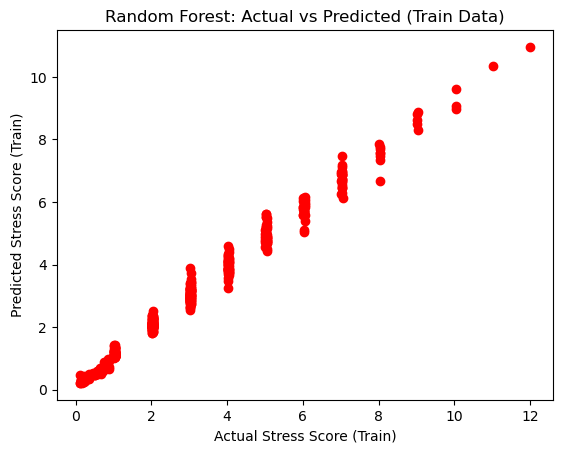

In [37]:
# Prediction on Train Data
 
train_pred_rf = rf_model.predict(X_train)

print("\n\t  *********************************************************")
print("\n\t Random Forest Train R squared : ", metrics.r2_score(y_train, train_pred_rf))
print("\n\t Random Forest Train Mean Absolute Error : ", metrics.mean_absolute_error(y_train, train_pred_rf))
print("\n\t  ********************************************************* \n\n")


plt.scatter(y_train, train_pred_rf, color="red")
plt.xlabel("Actual Stress Score (Train)")
plt.ylabel("Predicted Stress Score (Train)")
plt.title("Random Forest: Actual vs Predicted (Train Data)")
plt.show()



# Prediction on Test Data


	  *********************************************************

	 Random Forest Test R squared :  0.9348723365884797

	 Random Forest Test Mean Absolute Error :  0.3828430059134788

	  ********************************************************* 




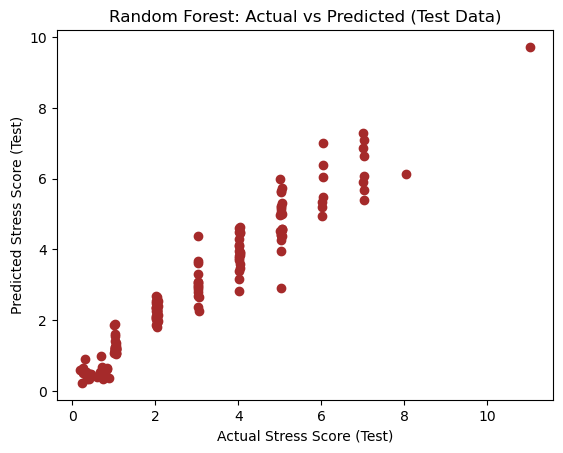

In [39]:
 test_pred_rf = rf_model.predict(X_test)

print("\n\t  *********************************************************")
print("\n\t Random Forest Test R squared : ", metrics.r2_score(y_test, test_pred_rf))
print("\n\t Random Forest Test Mean Absolute Error : ", metrics.mean_absolute_error(y_test, test_pred_rf))
print("\n\t  ********************************************************* \n\n")


plt.scatter(y_test, test_pred_rf, color="brown")
plt.xlabel("Actual Stress Score (Test)")
plt.ylabel("Predicted Stress Score (Test)")
plt.title("Random Forest: Actual vs Predicted (Test Data)")
plt.show()

# SVR Regressor

In [71]:
# Step 1: Import library
from sklearn.svm import SVR
from sklearn import metrics

# Step 2: Model create & train
svm_model = SVR(kernel='rbf')   # kernel = 'rbf' (Radial Basis Function)
svm_model.fit(X_train, y_train)

SVR(kernel='rbf')


SVR()


	  *********************************************************

	 SVM Train R squared :  0.982581309237072

	 SVM Train Mean Absolute Error :  0.1894110455131695

	  ********************************************************* 




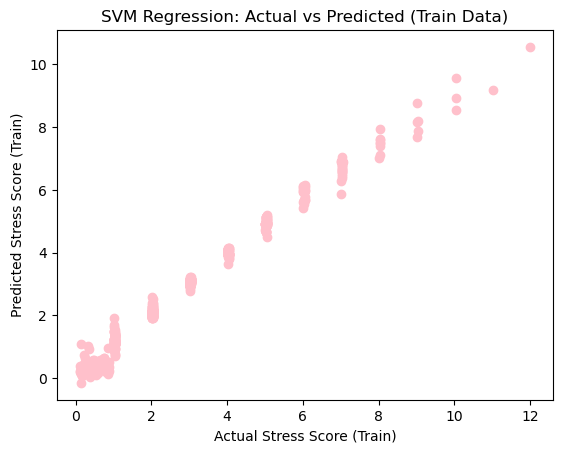

In [70]:
 # Prediction on Train Data
 
train_pred_svm = svm_model.predict(X_train)

# R squared error (Train)
score_train_r2_svm = metrics.r2_score(y_train, train_pred_svm)

# Mean Absolute Error (Train)
score_train_mae_svm = metrics.mean_absolute_error(y_train, train_pred_svm)

print("\n\t  *********************************************************")
print("\n\t SVM Train R squared : ", score_train_r2_svm)
print("\n\t SVM Train Mean Absolute Error : ", score_train_mae_svm)
print("\n\t  ********************************************************* \n\n")


# Scatter Plot (Train)
plt.scatter(y_train, train_pred_svm, color="pink")
plt.xlabel("Actual Stress Score (Train)")
plt.ylabel("Predicted Stress Score (Train)")
plt.title("SVM Regression: Actual vs Predicted (Train Data)")
plt.show()


# Prediction on Test Data


	  *********************************************************

	 SVM Test R squared :  0.9075861285147269

	 SVM Test Mean Absolute Error :  0.2573350047424992

	  ********************************************************* 




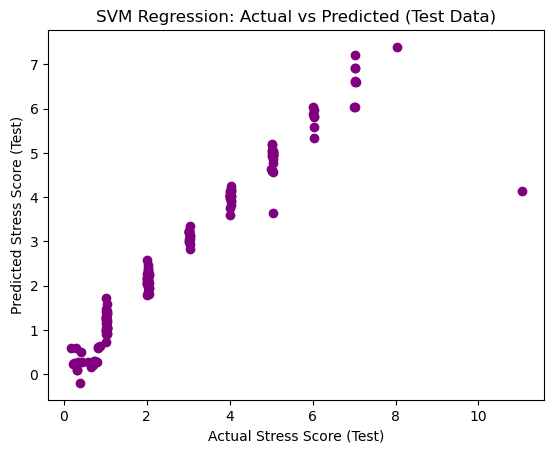

In [48]:

test_pred_svm = svm_model.predict(X_test)

# R squared error (Test)
score_test_r2_svm = metrics.r2_score(y_test, test_pred_svm)

# Mean Absolute Error (Test)
score_test_mae_svm = metrics.mean_absolute_error(y_test, test_pred_svm)

print("\n\t  *********************************************************")
print("\n\t SVM Test R squared : ", score_test_r2_svm)
print("\n\t SVM Test Mean Absolute Error : ", score_test_mae_svm)
print("\n\t  ********************************************************* \n\n")


# Scatter Plot (Test)
plt.scatter(y_test, test_pred_svm, color="purple")
plt.xlabel("Actual Stress Score (Test)")
plt.ylabel("Predicted Stress Score (Test)")
plt.title("SVM Regression: Actual vs Predicted (Test Data)")
plt.show()

# Decision Tree from Random forest

In [64]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

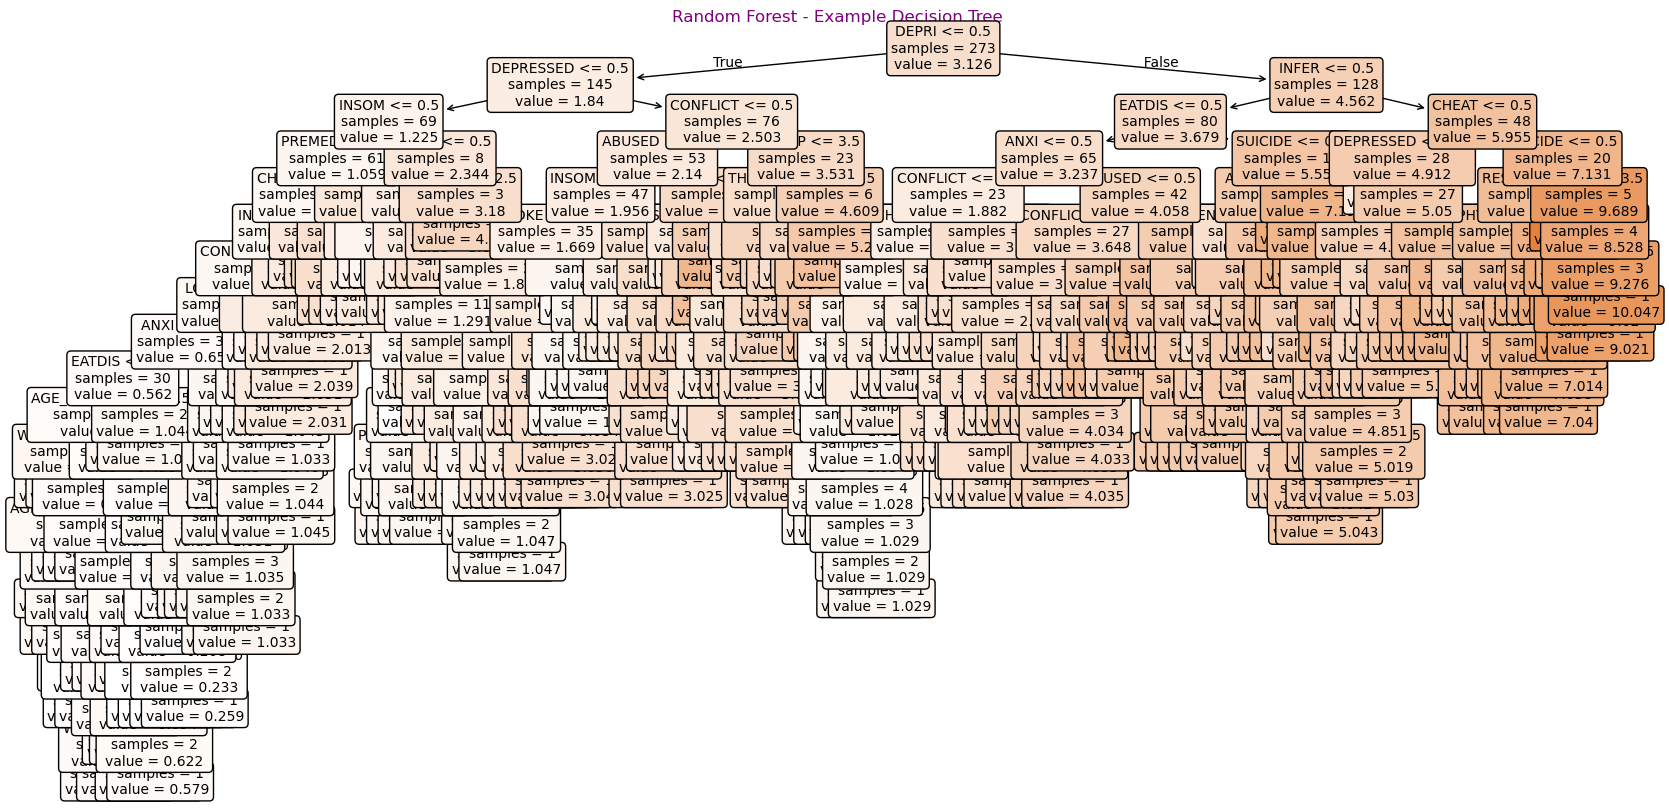

In [68]:


#  Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=25)
rf_model.fit(X_train, y_train)

#  Pick one tree from the forest (e.g first tree)
tree_to_plot = rf_model.estimators_[0]

#  Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_to_plot,
    feature_names=X.columns.tolist(),
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=False,    
)
plt.title("Random Forest - Example Decision Tree", color="purple")   
plt.show()